# Logistic Regression Assignment-3

# Q1. Explain the concept of precision and recall in the context of classification models.

Ans1.

Precision and recall are two important performance metrics used to evaluate the quality of a classification model, particularly
in binary classification tasks. These metrics focus on different aspects of a model's performance and are especially relevant
when dealing with imbalanced datasets or when different types of errors have different implications.

Precision (Positive Predictive Value):

Definition: Precision measures the accuracy of positive predictions made by the model. It quantifies the proportion of
    instances predicted as positive that are actually true positives. Precision is calculated as TP/(TP+FP).

Interpretation: Precision answers the question: "Of all the instances that the model predicted as positive, how many were 
        correctly classified?" It is concerned with minimizing false positives. In other words, it assesses the model's
        ability to avoid making incorrect positive predictions. High precision indicates that when the model predicts a 
        positive outcome, it's highly likely to be correct.

Use Cases: Precision is essential in scenarios where the cost of false positives is high, and you want to minimize the number
    of false alarms. Examples include medical diagnosis (avoiding incorrect disease diagnoses) and spam email detection 
    (minimizing false positives by not classifying legitimate emails as spam).

Recall (Sensitivity, True Positive Rate):

Definition: Recall measures the model's ability to identify all relevant positive instances from the total number of actual
    positive instances. It quantifies the proportion of true positives that were correctly classified by the model. Recall is 
    calculated as TP/(TP+FN).

Interpretation: Recall answers the question: "Of all the actual positive instances, how many did the model correctly classify?"
        It is concerned with minimizing false negatives. Recall assesses the model's ability to capture all positive cases,
        even at the cost of a higher false positive rate. High recall indicates that the model is sensitive to identifying 
        positive cases and aims to minimize missed positive instances.

Use Cases: Recall is crucial in scenarios where missing positive instances has significant consequences, and false negatives
    are costly. Examples include disease screening (ensuring all cases are identified, even at the risk of false alarms) and
    search and rescue operations (finding all missing persons).

In summary:

Precision is about the accuracy of positive predictions and is concerned with minimizing false positives. It is useful when the
cost of false alarms is high.

Recall is about the ability to capture all positive instances and is concerned with minimizing false negatives. It is essential
when missing positive instances has significant consequences.

Depending on your specific classification problem and the trade-offs between false positives and false negatives, you may need
to optimize your model's performance with respect to precision, recall, or a balance between the two using techniques like 
threshold adjustment.

# Q2. What is the F1 score and how is it calculated? How is it different from precision and recall?

Ans2.

The F1 score is a single performance metric used to assess the quality of a binary classification model, particularly when
dealing with imbalanced datasets or situations where both precision and recall are important. It combines both precision and 
recall into a single value, providing a balance between the two metrics.

Calculation of the F1 Score:

The F1 score is calculated using the formula: 2(Precision*Recall) / (Precision+Recall)

Precision: Precision is the proportion of true positive predictions (correct positive predictions) to the total number of
    positive predictions made by the model. It measures the accuracy of positive predictions and is calculated as TP/(TP+FP).

Recall: Recall is the proportion of true positive predictions to the total number of actual positive instances in the dataset. 
    It measures the model's ability to identify all relevant positive instances and is calculated as TP/(TP+FN).

The F1 score takes the harmonic mean of precision and recall, providing a balanced assessment of the model's performance. The 
harmonic mean gives more weight to lower values, making the F1 score sensitive to situations where either precision or recall
is significantly lower than the other. As a result, the F1 score tends to penalize models that have a substantial imbalance
between precision and recall.

Differences Between F1 Score, Precision, and Recall:

F1 Score: The F1 score combines precision and recall into a single metric. It balances the trade-off between precision and 
    recall and is especially useful when you want to assess a model's overall performance without favoring one metric over the
    other.

Precision: Precision measures the accuracy of positive predictions and is concerned with minimizing false positives. It answers
    the question: "Of all the instances predicted as positive, how many were correctly classified?"

Recall: Recall measures the model's ability to identify all relevant positive instances and is concerned with minimizing false
    negatives. It answers the question: "Of all the actual positive instances, how many did the model correctly classify?"

In summary, while precision and recall focus on specific aspects of a classification model's performance, the F1 score provides
a balanced evaluation by considering both false positives and false negatives. The choice between using precision, recall, or
the F1 score depends on the specific requirements and priorities of your classification problem.

# Q3. What is ROC and AUC, and how are they used to evaluate the performance of classification models?

Ans3.

ROC (Receiver Operating Characteristic) Curve and AUC (Area Under the ROC Curve) are widely used evaluation metrics for
assessing the performance of binary classification models. They help visualize and quantify the model's ability to 
distinguish between the positive and negative classes, particularly when you vary the classification threshold.

ROC Curve:

Definition: The ROC curve is a graphical representation of a classification model's performance across different threshold 
    settings. It plots the True Positive Rate (Recall) against the False Positive Rate at various threshold values.
Interpretation: The ROC curve shows the trade-off between the model's sensitivity (the ability to correctly identify positive 
    instances) and its specificity (the ability to correctly identify negative instances) across different threshold levels. 
    The curve is typically ascending, with better models having curves that rise steeply toward the upper-left corner,
    indicating high sensitivity and low false positive rates.
    
Usage: You can visually assess a model's performance by examining its ROC curve. A curve closer to the upper-left corner 
    indicates better discrimination ability, while a diagonal line (representing random guessing) indicates poor discrimination.
    Models with curves below the diagonal line are worse than random guessing.
AUC (Area Under the ROC Curve):

Definition: The AUC is a numerical value that quantifies the overall performance of a classification model by measuring the 
    area under its ROC curve. A perfect model has an AUC of 1, while a random model has an AUC of 0.5 (the diagonal line).
Interpretation: The AUC provides a single scalar value to assess the model's ability to distinguish between positive and 
    negative instances. A higher AUC indicates better overall model performance. An AUC of 0.5 suggests that the model performs
    no better than random guessing, while an AUC greater than 0.5 indicates an improvement over random guessing.
Usage: Comparing the AUC values of different models allows you to determine which model has superior discrimination ability. 
    Higher AUC values indicate better separation between the classes.
Key Points:

ROC curves and AUC are particularly useful when you want to assess a model's performance across various threshold settings,
especially when precision and recall may have trade-offs.
They are insensitive to class imbalance, making them suitable for imbalanced datasets.
ROC curves and AUC are not suitable for multi-class classification; they are primarily used for binary classification problems.
In summary, ROC curves and AUC provide a comprehensive evaluation of a classification model's performance by visualizing its 
ability to discriminate between positive and negative classes at different thresholds and quantifying that performance as a
single AUC value. They are valuable tools for comparing and selecting models, particularly when you need to balance sensitivity
and specificity.

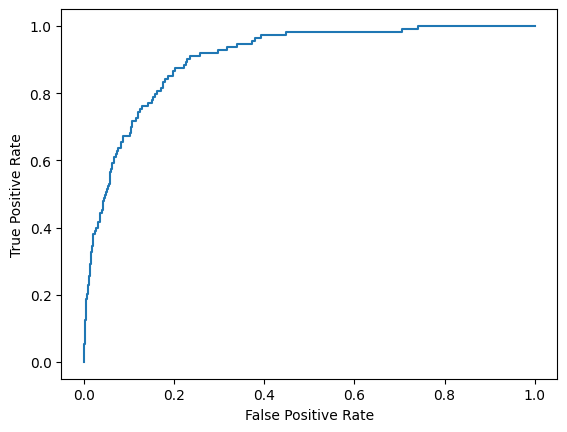

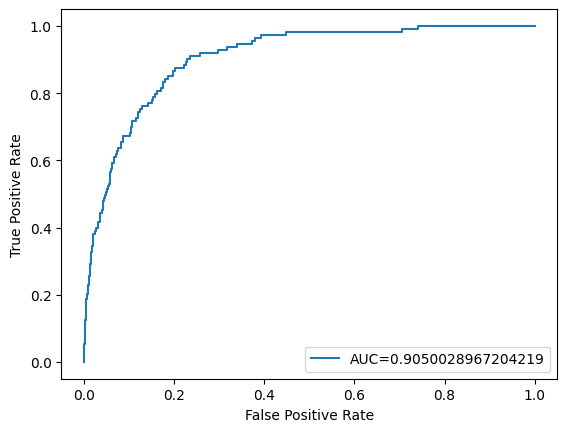

In [1]:
#Step 1:Import modules and fit logistic regression model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

#import dataset from CSV file on Github
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
data = pd.read_csv(url)

#define the predictor variables and the response variable
X = data[['student', 'balance', 'income']]
y = data['default']

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

#Step 2: Plot the ROC Curve
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Step 3: Calculate the AUC
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Q4. How do you choose the best metric to evaluate the performance of a classification model?

Ans4.

Choosing the best metric to evaluate the performance of a classification model depends on the specific characteristics of
your problem, your objectives, and the trade-offs you are willing to make.

Some common evaluation metrics for classification models and guidelines on how to choose the most appropriate one:

Accuracy:

When to Use: Accuracy is suitable when the class distribution is balanced (approximately equal instances of each class). It
    measures the overall correctness of predictions.
Considerations: Accuracy can be misleading when dealing with imbalanced datasets, where one class significantly outnumbers the
    other. In such cases, high accuracy can be achieved by simply predicting the majority class, even if the model fails to 
    detect the minority class.
Precision and Recall:

When to Use: Use precision when minimizing false positives (Type I errors) is critical, and you want to assess the accuracy of
    positive predictions. Use recall when minimizing false negatives (Type II errors) is crucial, and you want to ensure that 
    all relevant positive instances are captured.
Considerations: Precision and recall are often used together to assess a model's ability to balance Type I and Type II errors.
    You may need to make a trade-off between precision and recall based on the problem's context.
F1-Score:

When to Use: The F1-score is useful when you want to balance precision and recall and obtain a single metric that combines
    both. It's particularly valuable in scenarios where precision and recall have trade-offs.
Considerations: The F1-score can be a better choice than accuracy when dealing with imbalanced datasets, where one class is
    much smaller than the other.
    
ROC Curve and AUC:

When to Use: ROC curves and AUC are valuable when you want to assess a model's discrimination ability across various threshold
    settings and prioritize the trade-off between true positives and false positives.
Considerations: These metrics are suitable for imbalanced datasets and help you choose an appropriate threshold based on your
    problem's requirements.
Specificity:

When to Use: Specificity measures a model's ability to correctly identify the negative class. It's useful when minimizing false
    positives in the negative class is essential.
Considerations: Specificity is particularly relevant in applications where the cost of false negatives in the negative class is
    high.
Balanced Accuracy:

When to Use: Balanced accuracy is useful when the class distribution is imbalanced. It calculates the average of recall for
    each class, considering class-specific performance.
Considerations: Balanced accuracy provides a fair evaluation when class sizes differ significantly.
    
    
Ultimately, the choice of the best metric depends on the specific goals and priorities of your classification problem. It's
essential to consider the class distribution, the relative costs of different types of errors, and the specific context of your
application when selecting an appropriate evaluation metric or combination of metrics. In practice, it's often beneficial to 
use multiple metrics to gain a more comprehensive understanding of your model's performance.

# Q5. What is multiclass classification and how is it different from binary classification?

Ans5.

Multiclass classification and binary classification are two fundamental types of supervised machine learning tasks used to
categorize data into different classes or categories. Here's an explanation of each and the key differences between them:

Binary Classification:

Definition: Binary classification is a type of classification problem where the goal is to categorize data into one of two 
    possible classes or categories: typically, positive (1) or negative (0). It involves determining a decision boundary that
        separates the two classes.
        
Examples: Spam detection (classifying emails as spam or not spam), medical diagnosis (distinguishing between diseased and
        healthy individuals), and sentiment analysis (categorizing sentiment as positive or negative) are common examples of
    binary classification tasks.
    
Output: The model produces a single output or probability score that indicates the likelihood of an instance belonging to the
    positive class.
    
Multiclass Classification:

Definition: Multiclass classification, also known as multinomial classification, is a type of classification problem where
    there are more than two distinct classes or categories, and the goal is to assign each instance to one of these multiple 
    classes.
Examples: Handwritten digit recognition (recognizing digits from 0 to 9), object recognition (classifying images into various
        objects or animals), and language identification (identifying the language of a text) are examples of multiclass 
    classification problems.
Output: The model produces multiple class probabilities or labels, one for each class, and assigns an instance to the class
    with the highest probability or confidence score.
    
Key Differences:

Number of Classes:

In binary classification, there are only two classes (positive and negative).
In multiclass classification, there are three or more distinct classes.
Output Format:

In binary classification, the model typically produces a single output or probability score that indicates the likelihood of 
belonging to the positive class (e.g., a probability between 0 and 1).
In multiclass classification, the model produces multiple class probabilities or labels, and each instance is assigned to one 
of the multiple classes.
Decision Boundary:

Binary classification seeks to find a decision boundary that separates two classes.
Multiclass classification involves distinguishing between multiple classes, often requiring a more complex decision boundary.
Model Complexity:

Binary classification models are designed to address two-class problems and are often simpler.
Multiclass classification models are typically more complex because they need to accommodate multiple classes and their 
relationships.
Evaluation Metrics:

In binary classification, common evaluation metrics include accuracy, precision, recall, F1-score, ROC-AUC, and others.
In multiclass classification, similar metrics can be used, but they may be extended or modified to account for multiple
classes, such as micro-averaging, macro-averaging, and confusion matrices for each class.

# Q6. Explain how logistic regression can be used for multiclass classification.

Ans6.

Logistic regression is a binary classification algorithm, but it can be extended to handle multiclass classification problems
through various techniques. One common approach is to use "One-vs-All" (also known as "One-vs-Rest") or "One-vs-Rest" (OvR) 
encoding. Here's how logistic regression can be adapted for multiclass classification using the OvR technique:

One-vs-Rest (OvR) Multiclass Classification:

Data Preparation:

Given a multiclass classification problem with K classes, you prepare the dataset with K binary classification problems, one
for each class.
For each binary problem, you create a new target variable that represents whether an instance belongs to the current class
(positive class) or not (negative class).
Training Multiple Binary Classifiers:

Train a separate logistic regression model for each of the K binary classification problems.
In each model, you use the original feature set but modify the target variable to indicate whether an instance belongs to the
current class (positive class) or any other class (negative class).
Predictions:

To make a multiclass prediction for a new instance, you apply all K trained models to it.
Each model produces a probability score indicating the likelihood of the instance belonging to its respective class.
The class with the highest probability score is assigned as the final predicted class for the instance.
Decision Threshold:

You can choose a decision threshold for each binary model to convert probability scores into class predictions. A common 
threshold is 0.5, but you can adjust it to control precision and recall trade-offs for individual models.
Advantages of OvR for Logistic Regression in Multiclass Classification:

Simplicity: OvR is straightforward to implement and extends binary logistic regression naturally to multiclass problems.
Interpretability: Each binary model provides interpretable coefficients, making it easier to understand the impact of features
    on individual classes.
Scalability: OvR can handle multiclass problems with a large number of classes without significantly increasing model 
    complexity.
    
Limitations of OvR:

Class Imbalance: If the dataset is imbalanced (some classes have many more instances than others), OvR may lead to biased 
    models, as models for minority classes may be undertrained.
    
Dependencies: OvR assumes that the classes are independent, which may not hold in some cases (e.g., if classes are hierarchical
            or have relationships).
    
Complexity: For a large number of classes, the number of binary models can become substantial, potentially leading to longer 
    training times and increased storage requirements.
Logistic regression can be adapted for multiclass classification using the OvR technique, which trains multiple binary models, 
one for each class. While it's a simple and interpretable approach, it may have limitations related to class imbalance and 
class dependencies in complex multiclass problems. Other advanced techniques like softmax regression (multinomial logistic 
regression) are also available for multiclass classification and may offer better performance in certain scenarios.

In [2]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Generate a random multiclass classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=3, n_informative=8)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a logistic regression model using softmax regression
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(X_train, y_train)

# Predict the class labels for the test set
y_pred = lr.predict(X_test)

# Print the accuracy score
accuracy = lr.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.68


<AxesSubplot: >

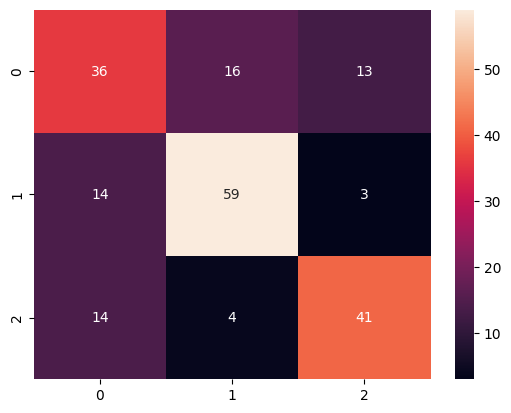

In [3]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf = confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True)

# Q7. Describe the steps involved in an end-to-end project for multiclass classification.

Ans7.
Steps involved in an end-to-end project for multiclass classification are :

Problem Definition and Data Collection:

Clearly define the multiclass classification problem you want to solve and understand the business or research objectives.
Gather a labeled dataset that includes features (attributes) and class labels for each instance. Ensure the data is 
representative of the problem domain.
Data Preprocessing:

Explore and understand the dataset by performing data analysis and visualization to identify patterns, distributions, and 
outliers.
Clean the data by handling missing values, outliers, and anomalies.
Perform feature engineering, which may include feature selection, transformation, or creation of new features to improve model
performance.
Data Splitting:

Split the dataset into three subsets: training, validation, and test sets. Common splits include 70-80% for training, 10-15%
    for validation, and 10-15% for testing.
Ensure that class distributions are balanced across the splits to prevent bias.
Model Selection:

Choose an appropriate machine learning algorithm or model architecture for multiclass classification. Options include logistic
regression, decision trees, random forests, support vector machines, neural networks, and more.
Consider the characteristics of your data, model complexity, and interpretability when selecting the model.

Model Training:

Train the selected model using the training dataset. This involves feeding the features and corresponding class labels into
the model and adjusting its parameters to minimize a loss function.
Experiment with hyperparameter tuning and cross-validation to optimize the model's performance.
Model Evaluation:

Assess the model's performance using the validation dataset and appropriate evaluation metrics (e.g., accuracy, precision, 
recall, F1-score, ROC-AUC).
Utilize techniques like a confusion matrix or ROC curves for a deeper analysis of model errors.
Consider adjusting the model or features based on evaluation results.

Model Optimization:

Fine-tune the model by modifying hyperparameters, using different algorithms, or addressing issues like overfitting or 
underfitting.
Continue iterating on the model and validation until you achieve satisfactory performance.
Final Model Testing:

Evaluate the final model's performance on the test dataset to estimate its generalization ability to new, unseen data.
Ensure that the test dataset is completely separate from the training and validation datasets.

Monitoring and Maintenance:

Continuously monitor the model's performance in production to detect any drift or degradation in accuracy.
Implement regular model retraining or updates as new data becomes available or as business requirements change.
Documentation and Reporting:

Document all aspects of the project, including data preprocessing steps, model architecture, hyperparameters, and evaluation 
metrics. Create clear and concise reports or documentation to communicate results, findings, and recommendations to stakeholders.

# Q8. What is model deployment and why is it important?

Ans8.

Model deployment is the process of making a trained machine learning model operational and accessible for real-world use. It
involves integrating the model into a production environment or system where it can receive input data, make predictions or
classifications, and provide output to end-users or other downstream applications.

Model deployment is a crucial step in the machine learning workflow for several reasons:

Realizing Value: The primary goal of developing machine learning models is often to leverage them for decision-making, 
    automation, or improving processes. Model deployment is the step where the model begins delivering value by making 
    predictions on new, unseen data.

Scalability: Deployed models can handle a high volume of data and predictions, making it possible to automate tasks that 
    would be time-consuming or infeasible for humans to perform at scale.

Timeliness: Deployed models can provide predictions in real-time or near real-time, enabling timely decision-making and 
    responses to changing conditions.

Continuous Learning: Deployment allows models to continuously learn and adapt to new data, improving their accuracy and
    relevance over time.

Integration: Deployed models can be integrated into existing software systems, workflows, or applications, making them an
    integral part of an organization's operations.

Cost Efficiency: By automating tasks through deployment, organizations can often reduce costs associated with manual labor or
    errors.

Accessibility: Deployed models can be accessed by end-users, stakeholders, or other systems through various interfaces, such as
    APIs (Application Programming Interfaces), web applications, or batch processing.

Monitoring and Maintenance: Once a model is deployed, it can be continuously monitored to ensure its performance and accuracy.
    If the model's performance degrades or drifts, adjustments or retraining can be initiated.

Overall, model deployment bridges the gap between model development and real-world applications, allowing organizations to
harness the predictive power of machine learning in a practical and scalable manner. It's a critical phase in the machine 
learning lifecycle that requires careful planning, implementation, and ongoing management to ensure successful and effective
deployment.

# Q9. Explain how multi-cloud platforms are used for model deployment.

Ans9.

Multi-cloud platforms can be used for model deployment in a variety of ways to enhance redundancy, performance, and 
flexibility. Here's how multi-cloud platforms are used for model deployment:

Redundancy and High Availability:

Deploying models on multiple cloud providers ensures redundancy and high availability. If one provider experiences downtime or 
issues, the model can continue to serve predictions from resources hosted on another provider's infrastructure.

Global Reach and Low Latency:

Multi-cloud deployment allows you to host models in data centers across different regions and countries. This reduces latency 
and provides a better user experience by allowing users to access the model from the nearest data center.

Cost Optimization:

Different cloud providers offer varying pricing structures and options. You can optimize costs by choosing the most 
cost-effective provider for each component of your model deployment, such as model serving, data storage, or scaling resources.

Vendor Diversification:

Using multiple cloud providers mitigates the risk of vendor lock-in, where you become overly dependent on a single provider's
services. This approach allows you to maintain flexibility and switch providers if necessary.

Compliance and Data Residency:

Multi-cloud platforms enable compliance with data residency regulations by allowing you to store data and deploy models in
specific regions that align with legal requirements.

Resource Scaling and Load Balancing:

You can dynamically scale resources up or down across different cloud providers based on demand. Load balancing and traffic
management solutions distribute incoming requests intelligently to optimize resource utilization and response times.

Disaster Recovery and Failover:

Multi-cloud deployments enhance disaster recovery capabilities by replicating data and applications across cloud providers. In
the event of a major outage with one provider, the model can still be accessed from another provider's infrastructure.

Security and Risk Mitigation:

Spreading data and model deployments across multiple cloud providers can help protect against security breaches or 
vulnerabilities associated with a single provider. It adds an extra layer of security.

Hybrid Cloud Integration:

Multi-cloud platforms can facilitate hybrid cloud deployments, allowing you to integrate on-premises resources or private
clouds with public cloud deployments as needed.

# Q10. Discuss the benefits and challenges of deploying machine learning models in a multi-cloud environment.

Ans10.
Benefits of Multi-Cloud Model Deployment:

Redundancy and High Availability:

Benefit: Multi-cloud deployment provides redundancy and high availability. If one cloud provider experiences downtime, the 
    model can continue to function from resources on another provider's infrastructure.
    
Example: An e-commerce platform ensures that its recommendation model remains available even if one cloud provider experiences
    an outage during a major shopping event.
    
Performance Optimization:

Benefit: By strategically placing model-serving resources in different regions, organizations can reduce latency and improve 
    the user experience for a global audience.
Example: A video streaming service uses multi-cloud deployment to ensure viewers in different countries experience minimal 
    buffering and fast playback.
    
Cost Optimization:

Benefit: Organizations can choose the most cost-effective cloud provider for different components of model deployment, 
    resulting in cost savings.
    
Example: A data-intensive research project leverages one cloud provider's cost-effective storage solution while using another
    provider for GPU-accelerated model training.
    
Vendor Diversification:

Benefit: Multi-cloud deployment mitigates the risk of vendor lock-in, allowing organizations to maintain flexibility and 
    switch providers if necessary.
Example: An enterprise opts for multi-cloud to avoid being tied to a single cloud provider's ecosystem, enabling future 
    migration or expansion options.
    
Compliance and Data Residency:

Benefit: Multi-cloud platforms facilitate compliance with data residency regulations by enabling data and model deployment in
    regions that align with legal requirements.
    
Example: A healthcare provider deploys patient data analysis models in regions where data privacy regulations are strictly 
    enforced.

Challenges of Multi-Cloud Model Deployment:

Complexity and Management:

Challenge: Managing resources, security, and configurations across multiple cloud providers can be complex and require 
    additional expertise.
Example: Orchestrating deployments and ensuring consistent security measures across different cloud environments can be
    challenging.
Cost Tracking and Optimization:

Challenge: Cost tracking becomes more complex as resources are spread across multiple providers, making it essential to monitor
    and optimize costs effectively.
    
Example: Keeping track of spending and optimizing resource allocation across multiple providers can require dedicated cost
    management efforts.
    
Interoperability and Compatibility:

Challenge: Ensuring compatibility and interoperability between different cloud providers' services and APIs may require extra
    effort and development.
Example: Integrating services and data pipelines from different cloud providers while maintaining consistency can be 
    challenging.
    
Data Synchronization and Consistency:

Challenge: Ensuring data consistency and synchronization across multiple cloud environments can be complex, especially for 
    real-time applications.
Example: A financial institution faces challenges in maintaining consistent transaction records when deploying financial 
    fraud detection models on multiple clouds.
    
Security and Compliance:

Challenge: Implementing robust security measures and ensuring compliance with regulations across multiple providers demands 
    careful planning and monitoring.
Example: Meeting stringent security requirements while deploying sensitive customer data models across multiple cloud 
    environments is a complex task.